In [17]:
import pandas as pd
df = pd.read_csv("./datasets/Market_Basket_Optimisation.csv")

In [18]:
transactions = df.stack().groupby(level=0).apply(list).tolist()

In [19]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

In [24]:
from mlxtend.frequent_patterns import apriori, association_rules

transaction_df = pd.DataFrame(te_ary, columns = te.columns_)
frequent = apriori(transaction_df, min_support=0.01, use_colnames = True)
rules = association_rules(frequent, metric='lift')
print(rules[['antecedents','consequents','support','confidence','lift']])

                    antecedents                 consequents   support  \
0               (mineral water)                   (avocado)  0.011467   
1                     (avocado)             (mineral water)  0.011467   
2                     (burgers)                      (cake)  0.011467   
3                        (cake)                   (burgers)  0.011467   
4                   (chocolate)                   (burgers)  0.017067   
..                          ...                         ...       ...   
425  (mineral water, spaghetti)                  (pancakes)  0.011467   
426       (pancakes, spaghetti)             (mineral water)  0.011467   
427             (mineral water)       (pancakes, spaghetti)  0.011467   
428                  (pancakes)  (mineral water, spaghetti)  0.011467   
429                 (spaghetti)   (mineral water, pancakes)  0.011467   

     confidence      lift  
0      0.048125  1.449559  
1      0.345382  1.449559  
2      0.131498  1.622103  
3      0.14

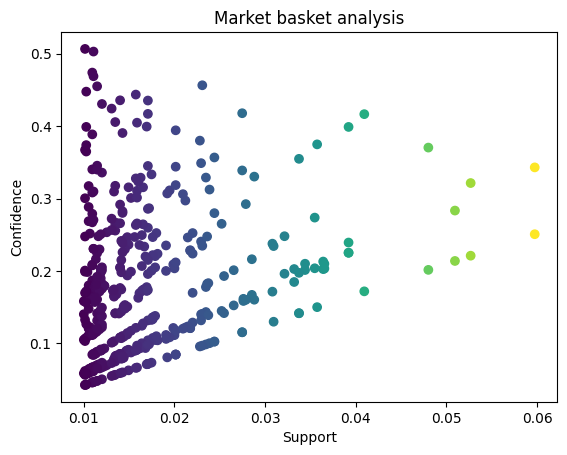

In [25]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'],rules['confidence'],c=rules["support"],cmap='viridis')
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Market basket analysis")
plt.show()